# Evaluation

In [1]:
import importnb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [15]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, X_train, y_train, y_pred_knn, y_pred_rf, y_pred_dt, y_pred_gb, knn, model_rf, model_dt, model_gb

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

In [3]:
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8705234159779615
Confusion Matrix:
[[313 110]
 [ 31 635]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       423
           1       0.85      0.95      0.90       666

    accuracy                           0.87      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.87      0.87      0.87      1089



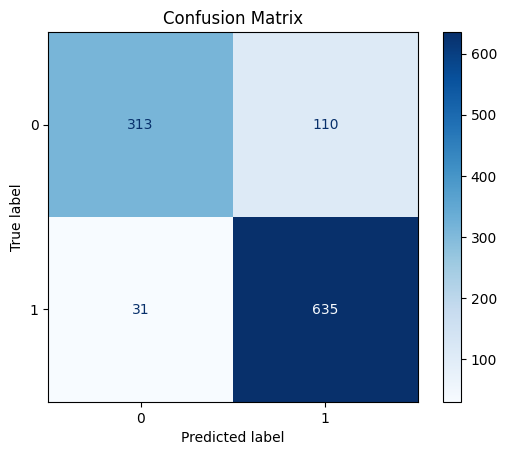

In [4]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

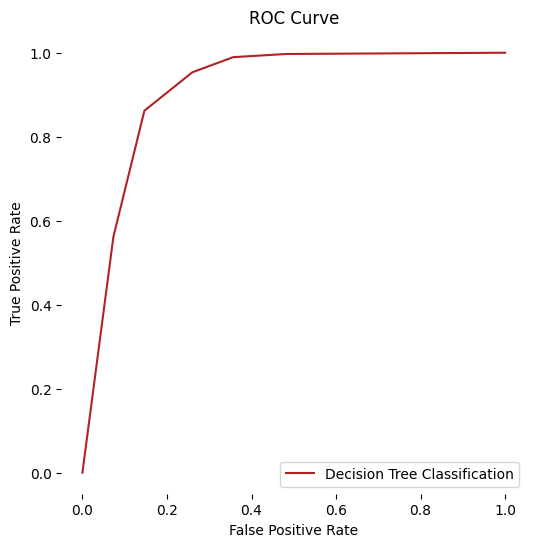

In [5]:
y_pred_probabiblity_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 2. Random Forest

In [6]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
precision_model_rf = precision_score(y_test, y_pred_rf)
recall_model_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Accuracy Random Forest: ", accurancy_model_rf)
print("Precision Score Random Forest: ", precision_model_rf)
print("Recall Score Random Forest: ", recall_model_rf)
print("F1 Score Random Forest: ", f1_score_rf)

Accuracy Random Forest:  0.9081726354453628
Precision Score Random Forest:  0.8941504178272981
Recall Score Random Forest:  0.963963963963964
F1 Score Random Forest:  0.9277456647398844


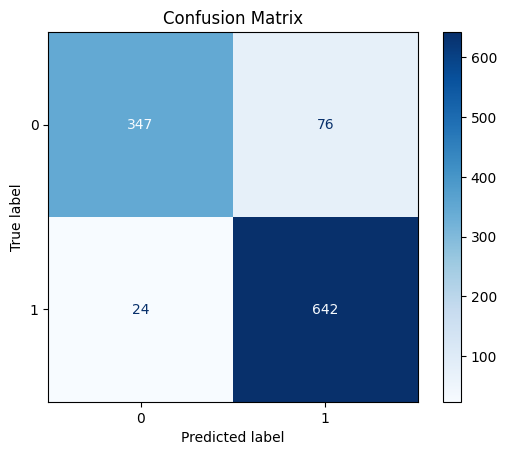

In [7]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

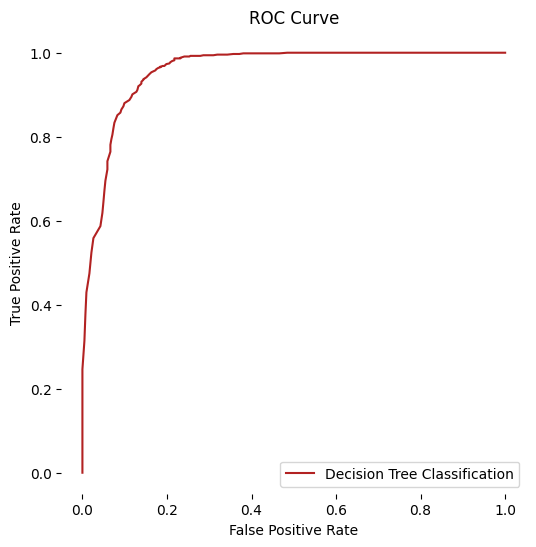

In [8]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 3. Decision Trees

In [9]:
y_pred_dt = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8429752066115702
Confusion Matrix:
[[348  75]
 [ 96 570]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       423
           1       0.88      0.86      0.87       666

    accuracy                           0.84      1089
   macro avg       0.83      0.84      0.84      1089
weighted avg       0.84      0.84      0.84      1089



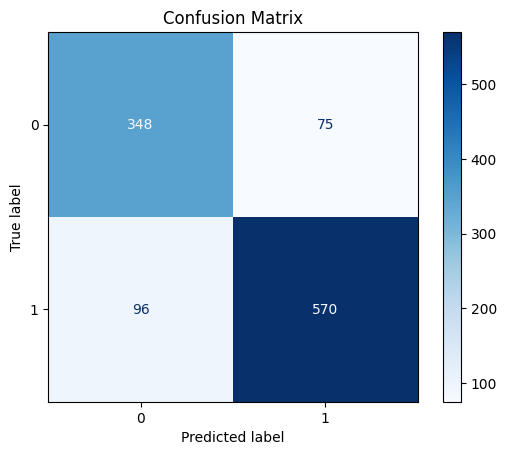

In [10]:
ConfusionMatrixDisplay(conf_matrix, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

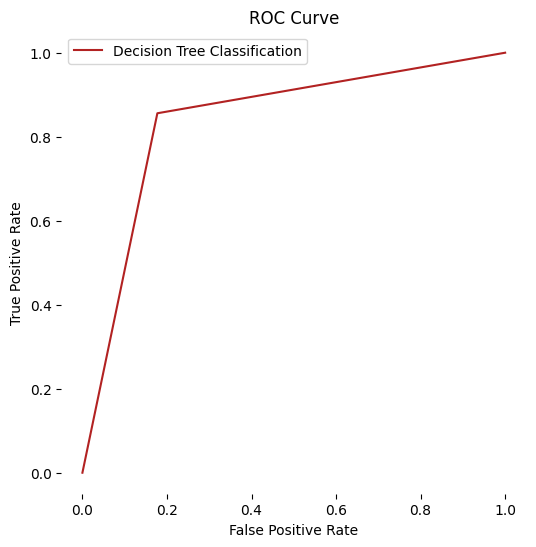

In [11]:
y_pred_probabiblity = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 4. Naive Bayes

In [12]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Accurancy Score Naive Bayes: ", accuracy_gb)
print("F1 Score Naive Bayes: ", f1_gb)

Accurancy Score Naive Bayes:  0.8420569329660239
F1 Score Naive Bayes:  0.8751814223512336


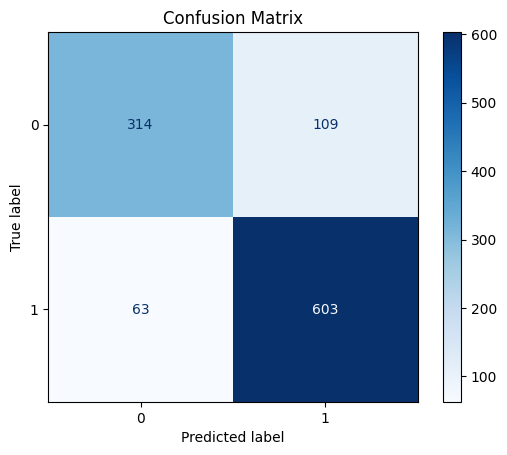

In [13]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

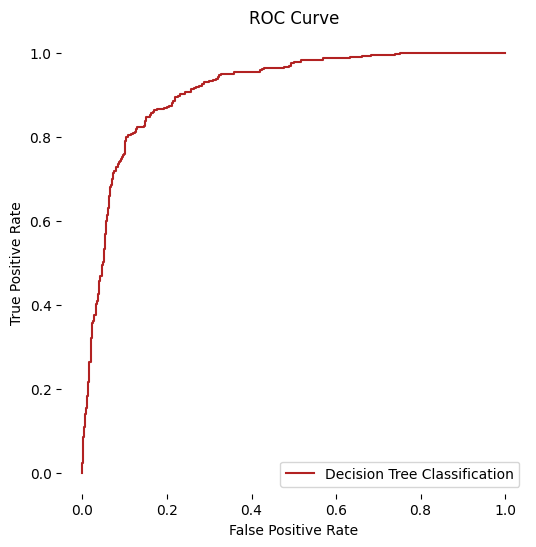

In [14]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()